In [1]:


import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from sympy import oo
sym.init_printing()
%matplotlib inline

## Puede que requiera incorporar más librerías o definir nuevas funciones.  Hágalo a continuación



def pole_zero_plot_(poles, zeros, ax=None):
    mR = -2
    MR = 2
    mI = -2
    MI = 2
    for pole in poles:
        plt.plot(complex(pole).real, complex(pole).imag, 'rx', markersize=10)
        if complex(pole).real < mR:
            mR = complex(pole).real
        if complex(pole).real > MR:
            MR = complex(pole).real
        if complex(pole).imag < mI:
            mI = complex(pole).imag
        if complex(pole).imag > MI:
            MI = complex(pole).imag
            
    for zero in zeros:
        plt.plot(complex(zero).real, complex(zero).imag, 'bo', markersize=10)
        if complex(zero).real < mR:
            mR = complex(zero).real
        if complex(zero).real > MR:
            MR = complex(zero).real
        if complex(zero).imag < mI:
            mI = complex(zero).imag
        if complex(zero).imag > MI:
            MI = complex(zero).imag

            
    if ax is None:
        ax = plt.gca()
    ax.set_aspect(1)
    
    plt.axis([mR*1.1, MR*1.1, mI*1.1, MI*1.1])
    plt.xlabel(r'$\Re \{ s \}$')
    plt.ylabel(r'$\Im \{ s \}$')
    plt.grid()

t = sym.symbols('t', real=True)
s = sym.symbols('s', complex=True)
sigma, omega = sym.symbols('sigma omega')



## Tarea

Nombres: **Jesus Hernan Castillo, Marlon Steven Vasquez Sanchez**

Suponga que tiene un sistema de tiempo continuo que se excita con una entrada $x(t)$ y responde con una señal $y(t)$, como lo muestra la figura:

![Diagrama de un bloque](bloque.png)

Analice el modelo del sistema para los modelos en cada uno de los casos siguientes:

|Caso  |       Ecuación                                                                         |
|------|----------------------------------------------------------------------------------------|
| A    | \begin{equation} \frac{dy}{dt} + 5y(t) = 5x(t) \end{equation}                          |
| B    | \begin{equation} \frac{dy}{dt} - 5y(t) = 5x(t) \end{equation}                          |
| C    | \begin{equation} \frac{dy}{dt} + 5y(t) = 1x(t) \end{equation}                          |
| D    | \begin{equation} \frac{d^{2}y}{dt^{2}} + 5\frac{dy}{dt} + y(t) = x(t) \end{equation}   |
| E    | \begin{equation} \frac{d^{2}y}{dt^{2}} + y(t) = x(t) \end{equation}                    |
| F    | \begin{equation} \frac{d^{2}y}{dt^{2}} + 0.5\frac{dy}{dt} + y(t) = x(t) \end{equation} |
| G    | \begin{equation} \frac{d^{2}y}{dt^{2}} - 5\frac{dy}{dt} + y(t) = x(t) \end{equation}   |
| H    | \begin{equation} \frac{d^{2}y}{dt^{2}} - 0.5\frac{dy}{dt} + y(t) = x(t) \end{equation} |


### Análisis

- Lleve la ecuación diferencial al dominio de las frecuencias usando la transformada de Laplace.
\begin{equation}
EscribaAquíLaEcuaciónTransformada
\end{equation}

- Encuentre la función de transferencia del sistema.
\begin{equation}
F(s) = EscribaAquíLaFunciónDeTransferencia
\end{equation}

- Grafique el mapa de polos y ceros

- Analice la gráfica obtenida, escriba su análisis y determine la estabilidad del sistema y el tipo de amortiguamiento.
    - Escriba aquí su discusión.
    - Puede usar viñetas o párrafos.
    - Conserve las sangrías para facilitar la lectura.

### Análisis A

\begin{equation} \frac{dy}{dt} + 5y(t) = 5x(t) \end{equation} 
- Lleve la ecuación diferencial al dominio de las frecuencias usando la transformada de Laplace.

\begin{equation}
s*Y(s)+5Y(s)-5X(s)=0
\end{equation}

- Encuentre la función de transferencia del sistema.
\begin{equation}
F(s) = Y (s) ( s +5 ) = 5X (s)
\end{equation}

\begin{equation}
F(s) = \frac{Y(s)}{X(s)} = \frac{5}{5 + s}
\end{equation}
- Grafique el mapa de polos y ceros

In [2]:
Xnum = 5
Xden = 5 + s
X = Xnum / Xden
X

In [3]:
poles = sym.roots(sym.denom(X), s)
poles

In [4]:
zeros = sym.roots(sym.numer(X), s)
zeros

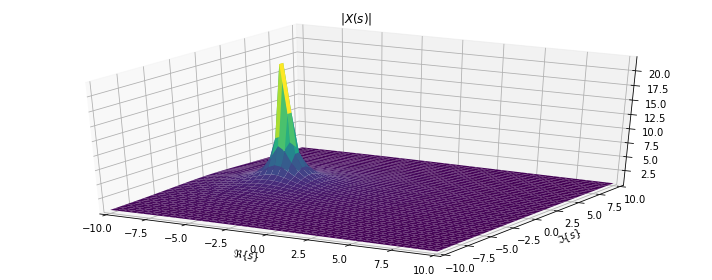

In [5]:
X1 = X.subs({s: sigma+sym.I*omega})
plt.rcParams['figure.figsize'] =10, 4
sym.plotting.plot3d(abs(X1),
                    (sigma, -10, 10),
                    (omega, -10, 10),
                    xlabel=r'$\Re\{s\}$', 
                    ylabel=r'$\Im\{s\}$', 
                    title=r'$|X(s)|$');

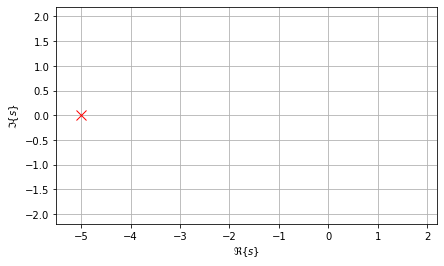

In [6]:
pole_zero_plot_(sym.roots(sym.denom(X), s), sym.roots(sym.numer(X), s))

- Analice la gráfica obtenida, escriba su análisis y determine la estabilidad del sistema y el tipo de amortiguamiento.
    - Estabilidad del sistema: segun la grafica el sistema es estable.
    - Tipo de amortiguamiento: Sobre amortiguado.
    - La occilacion es anulada por el sobre amortiguamiento y el polo tiene en su parte imaginaria igual a 0 como se identifica en la grafica.

In [7]:
X

In [76]:

Y_escalon = sym.inverse_laplace_transform(X,s,t)
Y_escalon

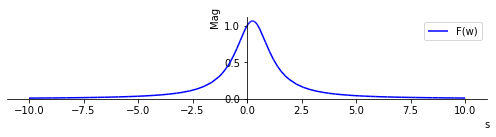

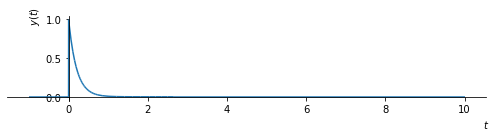

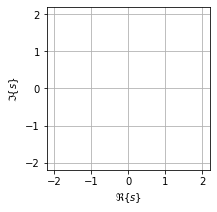

In [77]:
plt.rcParams['figure.figsize'] =7, 2
sym.plot(sym.Abs(X), (s,-10,10), ylabel=r'Mag',line_color='blue',legend=True, label = 'F(w)', show = True)

sym.plot(y_escalon, (t, -1, 10), xlabel='$t$', ylabel='$y(t)$');
plt.rcParams['figure.figsize'] = 3, 3
pole_zero_plot_(sym.roots(sym.denom(Y_escalon), s), sym.roots(sym.numer(Y_escalon), s))

- Defina un periodo de muestreo apropiado para el sistema.

\begin{equation}
T_\text{s} = 1/fs
\end{equation}

\begin{equation}
f_\text{s} = 2*Fmax
\end{equation}

\begin{equation}
f_\text{s} = 2 * 5 = 10Hz;  10Hz + 2 = 12Hz
\end{equation}

\begin{equation}
T_\text{s} = 1/fs;      1/12 = 0.0833 segundos
\end{equation}

- Encuentre el equivalente discreto del sistema (Ecuación en diferencias).
\begin{equation}
EscribaAquíLaEcuación
\end{equation}

**pista** : considere que $\frac{df}{dt} \approx \frac{f(k \cdot T_\text{s})-f((k-1)T_\text{s})}{T_\text{s}}$

- Encuentre la función de transferencia en $z$
\begin{equation}
F(z) = EscribaAquíLaFunciónDeTransferencia
\end{equation}
- Grafique el mapa de polos y ceros

In [ ]:
## Aquí va el código para generar la gráfica pedida. Ejecute el código para generar la gráfica.

- Grafique y compare la respuesta frecuencial del sistema en tiempo continuo y en tiempo discreto.

### Análisis B

\begin{equation} \frac{dy}{dt} - 5y(t) = 5x(t) \end{equation}
- Lleve la ecuación diferencial al dominio de las frecuencias usando la transformada de Laplace.

\begin{equation}
s*Y(s)-5Y(s)-5X(s)=0
\end{equation}

- Encuentre la función de transferencia del sistema.
\begin{equation}
F(s) = Y (s) ( s -5 ) = 5X (s)
\end{equation}

\begin{equation}
F(s) = \frac{Y(s)}{X(s)} = \frac{5}{5 - s}
\end{equation}
- Grafique el mapa de polos y ceros

In [10]:
Xnum = 5
Xden = 5 - s
X = Xnum / Xden
X

In [11]:
poles = sym.roots(sym.denom(X), s)
poles

In [12]:
zeros = sym.roots(sym.numer(X), s)
zeros

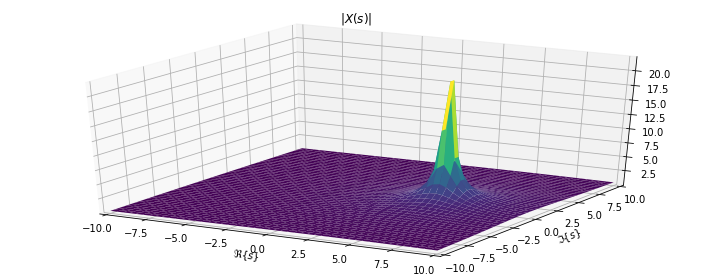

In [13]:
X1 = X.subs({s: sigma+sym.I*omega})
plt.rcParams['figure.figsize'] =10, 4
sym.plotting.plot3d(abs(X1),
                    (sigma, -10, 10),
                    (omega, -10, 10),
                    xlabel=r'$\Re\{s\}$', 
                    ylabel=r'$\Im\{s\}$', 
                    title=r'$|X(s)|$');

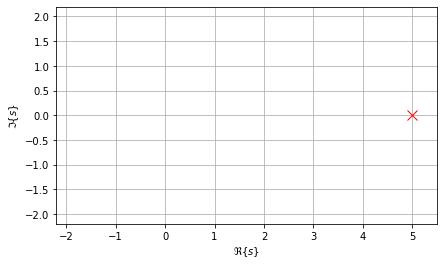

In [14]:
pole_zero_plot_(sym.roots(sym.denom(X), s), sym.roots(sym.numer(X), s))

- Analice la gráfica obtenida, escriba su análisis y determine la estabilidad del sistema y el tipo de amortiguamiento.
    - Estabilidad del sistema: segun la grafica el sistema es inestable.
    - Tipo de amortiguamiento: Sobre amortiguado.
    - La occilacion es anulada por el sobre amortiguamiento y el polo tiene en su parte imaginaria igual a 0 como se identifica en la grafica.

In [15]:
## Aquí va el código extra que puede requerir para responder a las preguntas.

In [16]:
Y_escalon=X
Y_escalon

In [17]:
X=Y_escalon
y_escalon = sym.inverse_laplace_transform(Y_escalon,s,t)
y_escalon

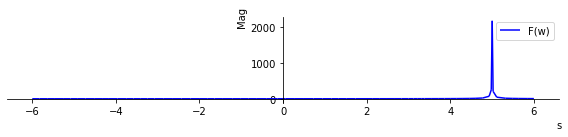

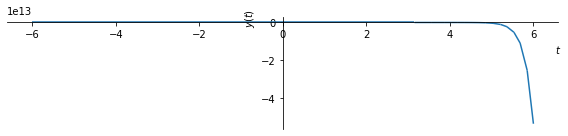

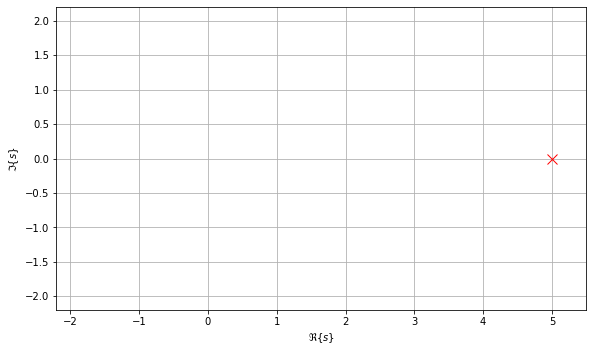

In [18]:
plt.rcParams['figure.figsize'] =8, 2
sym.plot(sym.Abs(X), (s,-6,6), ylabel=r'Mag',line_color='blue',legend=True, label = 'F(w)', show = True)

sym.plot(y_escalon, (t, -6, 6), xlabel='$t$', ylabel='$y(t)$');
plt.rcParams['figure.figsize'] = 9.5, 9.5
pole_zero_plot_(sym.roots(sym.denom(Y_escalon), s), sym.roots(sym.numer(Y_escalon), s))

- Defina un periodo de muestreo apropiado para el sistema.
\begin{equation}
T_\text{s} = 1/fs
\end{equation}

\begin{equation}
f_\text{s} = 2*Fmax
\end{equation}

\begin{equation}
f_\text{s} = 2 * 5 = 10Hz;  10Hz + 1 = 11Hz
\end{equation}

\begin{equation}
T_\text{s} = 1/fs;      1/11 = 0.090 segundos
\end{equation}

- Encuentre el equivalente discreto del sistema (Ecuación en diferencias).
\begin{equation}
EscribaAquíLaEcuación
\end{equation}

**pista** : considere que $\frac{df}{dt} \approx \frac{f(k \cdot T_\text{s})-f((k-1)T_\text{s})}{T_\text{s}}$

- Encuentre la función de transferencia en $z$
\begin{equation}
F(z) = EscribaAquíLaFunciónDeTransferencia
\end{equation}
- Grafique el mapa de polos y ceros

In [19]:
## Aquí va el código para generar la gráfica pedida. Ejecute el código para generar la gráfica.

- Grafique y compare la respuesta frecuencial del sistema en tiempo continuo y en tiempo discreto.

In [20]:
## Aquí va el código para generar la gráfica pedida. Ejecute el código para generar la gráfica.

### Análisis C

\begin{equation} \frac{dy}{dt} + 5y(t) = 1x(t) \end{equation}
- Lleve la ecuación diferencial al dominio de las frecuencias usando la transformada de Laplace.

\begin{equation}
s*Y(s)+5Y(s)-1X(s)=0
\end{equation}

- Encuentre la función de transferencia del sistema.
\begin{equation}
F(s) = Y (s) ( s +5 ) = 1X (s)
\end{equation}

\begin{equation}
F(s) = \frac{Y(s)}{X(s)} = \frac{1}{5 + s}
\end{equation}
- Grafique el mapa de polos y ceros

In [21]:
Xnum = 1
Xden = 5 + s
X = Xnum / Xden
X

In [22]:
poles = sym.roots(sym.denom(X), s)
poles

In [23]:
zeros = sym.roots(sym.numer(X), s)
zeros

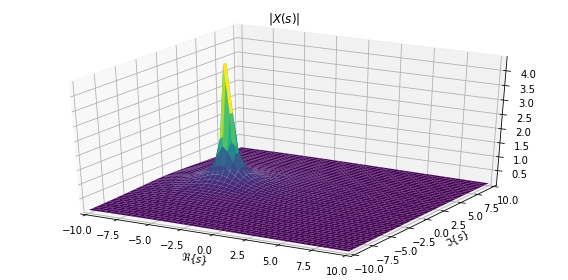

In [24]:
X1 = X.subs({s: sigma+sym.I*omega})
plt.rcParams['figure.figsize'] =8, 4
sym.plotting.plot3d(abs(X1),
                    (sigma, -10, 10),
                    (omega, -10, 10),
                    xlabel=r'$\Re\{s\}$', 
                    ylabel=r'$\Im\{s\}$', 
                    title=r'$|X(s)|$');

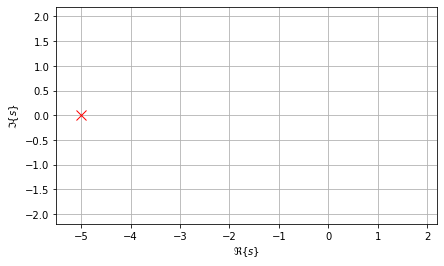

In [25]:
pole_zero_plot_(sym.roots(sym.denom(X), s), sym.roots(sym.numer(X), s))

- Analice la gráfica obtenida, escriba su análisis y determine la estabilidad del sistema y el tipo de amortiguamiento.
    - Estabilidad del sistema: segun la grafica el sistema es estable.
    - Tipo de amortiguamiento: Sobre amortiguado.
    - La occilacion es anulada por el sobre amortiguamiento y el polo tiene en su parte imaginaria igual a 0 como se identifica en la grafica.

In [26]:
## Aquí va el código extra que puede requerir para responder a las preguntas.

In [27]:
Y_escalon=X
Y_escalon

In [28]:
X=Y_escalon
y_escalon = sym.inverse_laplace_transform(Y_escalon,s,t)
y_escalon

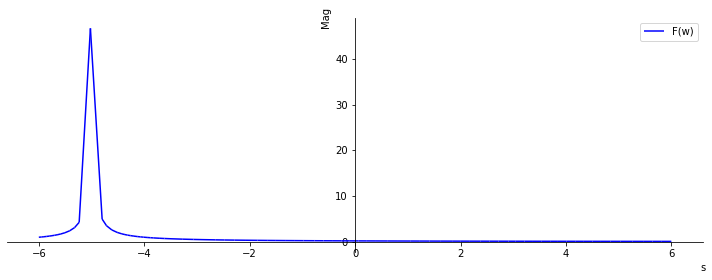

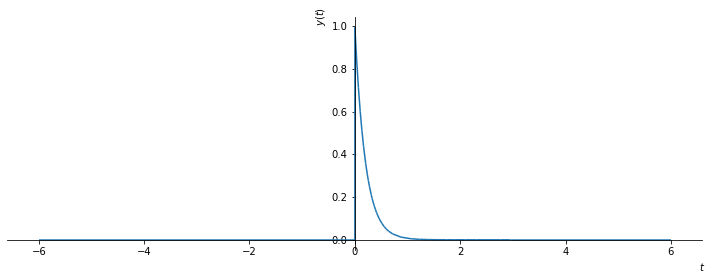

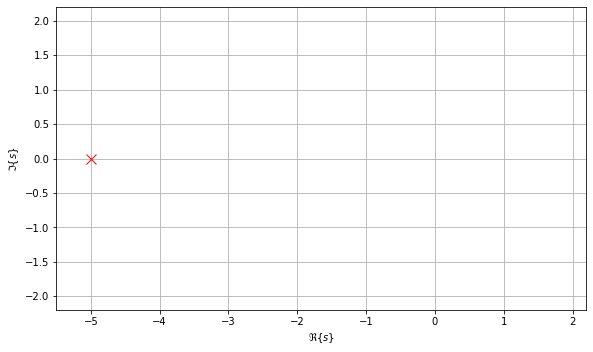

In [29]:
plt.rcParams['figure.figsize'] =10, 4
sym.plot(sym.Abs(X), (s,-6,6), ylabel=r'Mag',line_color='blue',legend=True, label = 'F(w)', show = True)

sym.plot(y_escalon, (t, -6, 6), xlabel='$t$', ylabel='$y(t)$');
plt.rcParams['figure.figsize'] = 9.5, 9.5
pole_zero_plot_(sym.roots(sym.denom(Y_escalon), s), sym.roots(sym.numer(Y_escalon), s))

- Defina un periodo de muestreo apropiado para el sistema.
\begin{equation}
T_\text{s} = 1/fs
\end{equation}

\begin{equation}
f_\text{s} = 2*Fmax
\end{equation}

\begin{equation}
f_\text{s} = 2 * 5 = 10Hz;  10Hz + 1.8 = 11.8Hz
\end{equation}

\begin{equation}
T_\text{s} = 1/fs;      1/11.8 = 0.084 segundos
\end{equation}
- Encuentre el equivalente discreto del sistema (Ecuación en diferencias).
\begin{equation}
EscribaAquíLaEcuación
\end{equation}

**pista** : considere que $\frac{df}{dt} \approx \frac{f(k \cdot T_\text{s})-f((k-1)T_\text{s})}{T_\text{s}}$

- Encuentre la función de transferencia en $z$
\begin{equation}
F(z) = EscribaAquíLaFunciónDeTransferencia
\end{equation}
- Grafique el mapa de polos y ceros

In [30]:
## Aquí va el código para generar la gráfica pedida. Ejecute el código para generar la gráfica.

- Grafique y compare la respuesta frecuencial del sistema en tiempo continuo y en tiempo discreto.

In [31]:
## Aquí va el código para generar la gráfica pedida. Ejecute el código para generar la gráfica.

### Análisis D

\begin{equation} \frac{d^{2}y}{dt^{2}} + 5\frac{dy}{dt} + y(t) = x(t) \end{equation}
- Lleve la ecuación diferencial al dominio de las frecuencias usando la transformada de Laplace.

\begin{equation}
s^{2}*Y(s)+5sY(s)+Y(s)-X(s)=0
\end{equation}

- Encuentre la función de transferencia del sistema.
\begin{equation}
F(s) = Y (s) ( s^{2}+5s+1 ) = X (s)
\end{equation}

\begin{equation}
F(s) = \frac{Y(s)}{X(s)} = \frac{1}{s^{2}+5s+1}
\end{equation}
- Grafique el mapa de polos y ceros

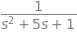

In [32]:
Xnum = 1
Xden = s**2+5*s+1
X = Xnum / Xden
X

In [33]:
poles = sym.roots(sym.denom(X), s)
poles

In [34]:
zeros = sym.roots(sym.numer(X), s)
zeros

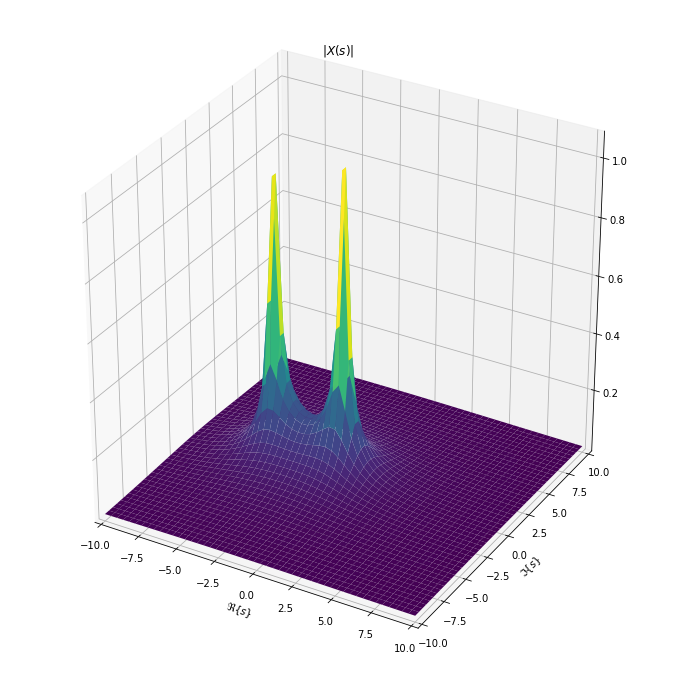

In [35]:
X1 = X.subs({s: sigma+sym.I*omega})

sym.plotting.plot3d(abs(X1),
                    (sigma, -10, 10),
                    (omega, -10, 10),
                    xlabel=r'$\Re\{s\}$', 
                    ylabel=r'$\Im\{s\}$', 
                    title=r'$|X(s)|$');

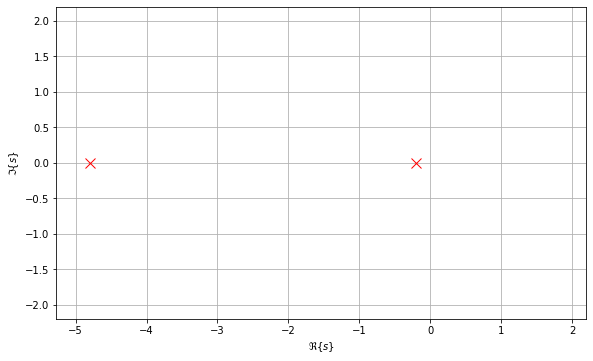

In [36]:
pole_zero_plot_(sym.roots(sym.denom(X), s), sym.roots(sym.numer(X), s))

- Analice la gráfica obtenida, escriba su análisis y determine la estabilidad del sistema y el tipo de amortiguamiento.
    - Estabilidad del sistema: segun la grafica el sistema es estable.
    - Tipo de amortiguamiento: Sobre amortiguado.
    - La occilacion es anulada por el sobre amortiguamiento y el polo tiene en su parte imaginaria igual a 0 como se identifica en la grafica.

In [37]:
## Aquí va el código extra que puede requerir para responder a las preguntas.

- Defina un periodo de muestreo apropiado para el sistema.
\begin{equation}
T_\text{s} = 1/fs
\end{equation}

\begin{equation}
f_\text{s} = 2*Fmax
\end{equation}

\begin{equation}
f_\text{s} = 2 * 4.79 = 9.58Hz;  9.58Hz + 1 = 10.58Hz
\end{equation}

\begin{equation}
T_\text{s} = 1/fs;      1/10.58 = 0.094 segundos
\end{equation}
- Encuentre el equivalente discreto del sistema (Ecuación en diferencias).
\begin{equation}
EscribaAquíLaEcuación
\end{equation}

**pista** : considere que $\frac{df}{dt} \approx \frac{f(k \cdot T_\text{s})-f((k-1)T_\text{s})}{T_\text{s}}$

- Encuentre la función de transferencia en $z$
\begin{equation}
F(z) = EscribaAquíLaFunciónDeTransferencia
\end{equation}
- Grafique el mapa de polos y ceros

In [38]:
## Aquí va el código para generar la gráfica pedida. Ejecute el código para generar la gráfica.

- Grafique y compare la respuesta frecuencial del sistema en tiempo continuo y en tiempo discreto.

In [39]:
## Aquí va el código para generar la gráfica pedida. Ejecute el código para generar la gráfica.

### Análisis E

\begin{equation} \frac{d^{2}y}{dt^{2}} + y(t) = x(t) \end{equation}  
- Lleve la ecuación diferencial al dominio de las frecuencias usando la transformada de Laplace.

\begin{equation}
s^{2}*Y(s)+Y(s)-X(s)=0
\end{equation}

- Encuentre la función de transferencia del sistema.
\begin{equation}
F(s) = Y(s) ( s^{2}+1 ) = X (s)
\end{equation}

\begin{equation}
F(s) = \frac{Y(s)}{X(s)} = \frac{1}{s^{2}+1}
\end{equation}
- Grafique el mapa de polos y ceros

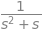

In [40]:
Xnum = 1
Xden = s**2 + s
X = Xnum / Xden
X

In [41]:
poles = sym.roots(sym.denom(X), s)
poles

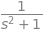

In [42]:

X = 1/(s**2 + 1)
X

In [43]:
poles = sym.roots(sym.denom(X), s)
poles

In [44]:
zeros = sym.roots(sym.numer(X), s)
zeros

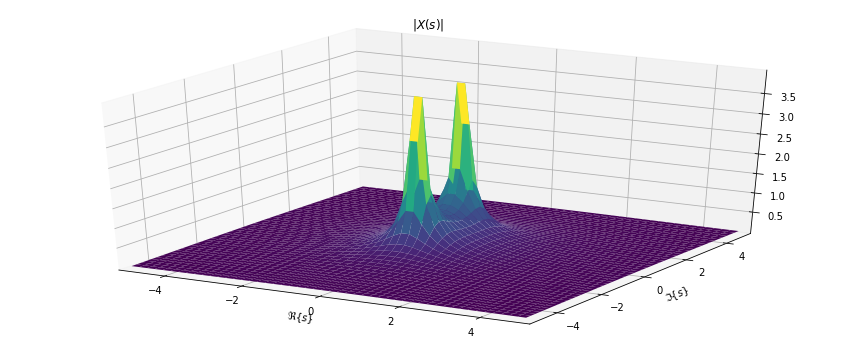

In [45]:
X1 = X.subs({s: sigma+sym.I*omega})
plt.rcParams['figure.figsize'] =12, 5
sym.plotting.plot3d(abs(X1),
                    (sigma, -5, 5),
                    (omega, -5, 5),
                    xlabel=r'$\Re\{s\}$', 
                    ylabel=r'$\Im\{s\}$', 
                    title=r'$|X(s)|$');

In [46]:
sym.denom(X)

In [47]:
sym.roots(sym.denom(X), s)

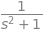

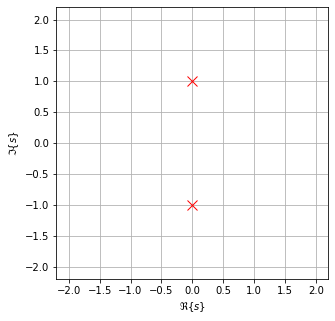

In [48]:
pole_zero_plot_(sym.roots(sym.denom(X), s), sym.roots(sym.numer(X), s))
X

- Analice la gráfica obtenida, escriba su análisis y determine la estabilidad del sistema y el tipo de amortiguamiento.
    - Estabilidad del sistema: Deacuerdo a la grafica el sitema es estable.
    - Tipo de amortguamiento: Es amortiguado ya que tiene polos reales iguales.
    - Ya que los polos se encuentran congugados y estan ubicados en eje de los reales, la  occilacion es anulada por el  amortiguamiento y el polo tiene en su parte imaginaria igual a 0 como se identifica en la grafica.

In [49]:
## Aquí va el código extra que puede requerir para responder a las preguntas.

- Defina un periodo de muestreo apropiado para el sistema.
\begin{equation}
T_\text{s} = EscribaAquíElPeriodoDeMuestreo
\end{equation}
- Encuentre el equivalente discreto del sistema (Ecuación en diferencias).
\begin{equation}
EscribaAquíLaEcuación
\end{equation}

**pista** : considere que $\frac{df}{dt} \approx \frac{f(k \cdot T_\text{s})-f((k-1)T_\text{s})}{T_\text{s}}$

- Encuentre la función de transferencia en $z$
\begin{equation}
F(z) = EscribaAquíLaFunciónDeTransferencia
\end{equation}
- Grafique el mapa de polos y ceros

In [50]:
## Aquí va el código para generar la gráfica pedida. Ejecute el código para generar la gráfica.

- Grafique y compare la respuesta frecuencial del sistema en tiempo continuo y en tiempo discreto.

In [51]:
## Aquí va el código para generar la gráfica pedida. Ejecute el código para generar la gráfica.

### Análisis F

\begin{equation} \frac{d^{2}y}{dt^{2}} + 0.5\frac{dy}{dt} + y(t) = x(t) \end{equation} 
- Lleve la ecuación diferencial al dominio de las frecuencias usando la transformada de Laplace.

\begin{equation}
s^{2}Y(s)+0.5s*Y(s)+Y(s)-X(s)=0
\end{equation}

- Encuentre la función de transferencia del sistema.
\begin{equation}
F(s) = Y (s) ( s^{2}+0.5s+1 ) = X (s)
\end{equation}

\begin{equation}
F(s) = \frac{Y(s)}{X(s)} = \frac{1}{s^{2}+0.5s+1}
\end{equation}
- Grafique el mapa de polos y ceros

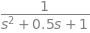

In [52]:
Xnum = 1
Xden = s**2+0.5*s+1
X = Xnum / Xden
X

In [53]:
poles = sym.roots(sym.denom(X), s)
poles

In [54]:
zeros = sym.roots(sym.numer(X), s)
zeros

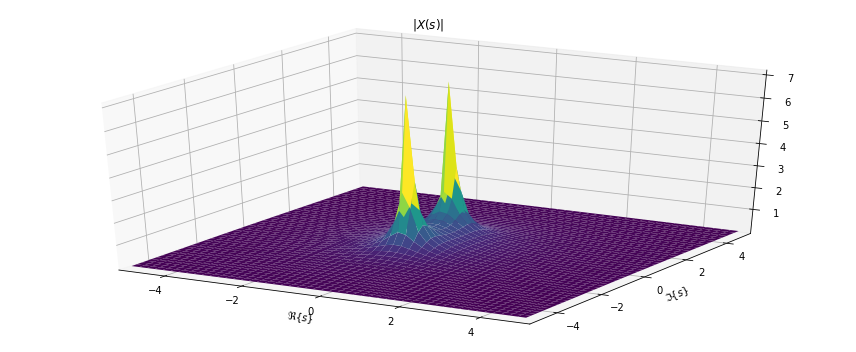

In [55]:
X1 = X.subs({s: sigma+sym.I*omega})

sym.plotting.plot3d(abs(X1),
                    (sigma, -5, 5),
                    (omega, -5, 5),
                    xlabel=r'$\Re\{s\}$', 
                    ylabel=r'$\Im\{s\}$', 
                    title=r'$|X(s)|$');

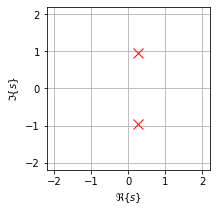

In [78]:
pole_zero_plot_(sym.roots(sym.denom(X), s), sym.roots(sym.numer(X), s))

- Analice la gráfica obtenida, escriba su análisis y determine la estabilidad del sistema y el tipo de amortiguamiento.
    - Estabilidad del sistema: Deacuerdo a la grafica el sitema es estable.
    - Tipo de amortguamiento: Es un sistema subamortiguado.
    - Ya que los polos se encuentran congugados y estan ubicados en eje de los reales, la  occilacion es anulada por el  subamortiguamiento y el polo tiene parte distinta a cero.

In [57]:
## Aquí va el código extra que puede requerir para responder a las preguntas.

- Defina un periodo de muestreo apropiado para el sistema.
\begin{equation}
T_\text{s} = EscribaAquíElPeriodoDeMuestreo
\end{equation}
- Encuentre el equivalente discreto del sistema (Ecuación en diferencias).
\begin{equation}
EscribaAquíLaEcuación
\end{equation}

**pista** : considere que $\frac{df}{dt} \approx \frac{f(k \cdot T_\text{s})-f((k-1)T_\text{s})}{T_\text{s}}$

- Encuentre la función de transferencia en $z$
\begin{equation}
F(z) = EscribaAquíLaFunciónDeTransferencia
\end{equation}
- Grafique el mapa de polos y ceros

In [58]:
## Aquí va el código para generar la gráfica pedida. Ejecute el código para generar la gráfica.

- Grafique y compare la respuesta frecuencial del sistema en tiempo continuo y en tiempo discreto.

In [59]:
## Aquí va el código para generar la gráfica pedida. Ejecute el código para generar la gráfica.

### Análisis G

\begin{equation} \frac{d^{2}y}{dt^{2}} - 5\frac{dy}{dt} + y(t) = x(t) \end{equation}  
- Lleve la ecuación diferencial al dominio de las frecuencias usando la transformada de Laplace.

\begin{equation}
s^{2}*Y(s)-5sY(s)+Y(s)-X(s)=0
\end{equation}

- Encuentre la función de transferencia del sistema.
\begin{equation}
F(s) = Y (s) ( s^{2}-5s+1 ) = X (s)
\end{equation}

\begin{equation}
F(s) = \frac{Y(s)}{X(s)} = \frac{1}{s^{2}-5s+1}
\end{equation}
- Grafique el mapa de polos y ceros

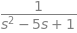

In [60]:
Xnum = 1
Xden = s**2-5*s+1
X = Xnum / Xden
X

In [61]:
poles = sym.roots(sym.denom(X), s)
poles

In [62]:
zeros = sym.roots(sym.numer(X), s)
zeros

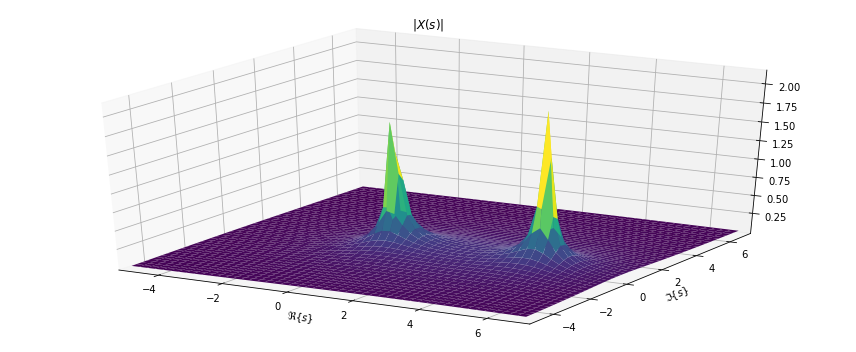

In [63]:
X1 = X.subs({s: sigma+sym.I*omega})

sym.plotting.plot3d(abs(X1),
                    (sigma, -5, 7),
                    (omega, -5, 7),
                    xlabel=r'$\Re\{s\}$', 
                    ylabel=r'$\Im\{s\}$', 
                    title=r'$|X(s)|$');

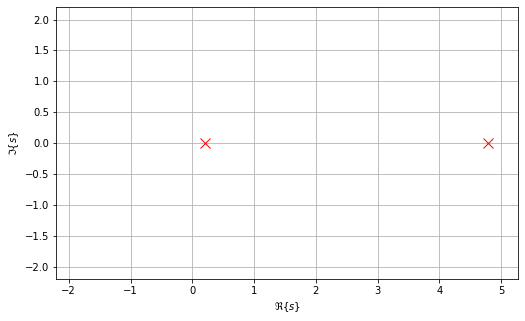

In [64]:
pole_zero_plot_(sym.roots(sym.denom(X), s), sym.roots(sym.numer(X), s))

- Analice la gráfica obtenida, escriba su análisis y determine la estabilidad del sistema y el tipo de amortiguamiento.
    - Estabilidad del sistema: Deacuerdo a la grafica el sitema es inestable.
    - Tipo de amortguamiento: Es un sistema subre amortiguado.
    - Ya que los polos se encuentran en la parte derecha de la grafica, la  oscilacion es anulada por el  subre amortiguamiento y el polo tiene parte imaginaria igual a cero.

In [65]:
## Aquí va el código extra que puede requerir para responder a las preguntas.

- Defina un periodo de muestreo apropiado para el sistema.
\begin{equation}
T_\text{s} = EscribaAquíElPeriodoDeMuestreo
\end{equation}
- Encuentre el equivalente discreto del sistema (Ecuación en diferencias).
\begin{equation}
EscribaAquíLaEcuación
\end{equation}

**pista** : considere que $\frac{df}{dt} \approx \frac{f(k \cdot T_\text{s})-f((k-1)T_\text{s})}{T_\text{s}}$

- Encuentre la función de transferencia en $z$
\begin{equation}
F(z) = EscribaAquíLaFunciónDeTransferencia
\end{equation}
- Grafique el mapa de polos y ceros

In [66]:
## Aquí va el código para generar la gráfica pedida. Ejecute el código para generar la gráfica.

- Grafique y compare la respuesta frecuencial del sistema en tiempo continuo y en tiempo discreto.

In [67]:
## Aquí va el código para generar la gráfica pedida. Ejecute el código para generar la gráfica.

### Análisis H

\begin{equation} \frac{d^{2}y}{dt^{2}} - 0.5\frac{dy}{dt} + y(t) = x(t) \end{equation} 
- Lleve la ecuación diferencial al dominio de las frecuencias usando la transformada de Laplace.

\begin{equation}
s^{2}Y(s)-0.5s*Y(s)+Y(s)-X(s)=0
\end{equation}

- Encuentre la función de transferencia del sistema.
\begin{equation}
F(s) = Y (s) ( s^{2}-0.5s+1 ) = X (s)
\end{equation}

\begin{equation}
F(s) = \frac{Y(s)}{X(s)} = \frac{1}{s^{2}-0.5s+1}
\end{equation}
- Grafique el mapa de polos y ceros

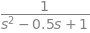

In [68]:
Xnum = 1
Xden = s**2-0.5*s+1
X = Xnum / Xden
X

In [69]:
poles = sym.roots(sym.denom(X), s)
poles

In [70]:
zeros = sym.roots(sym.numer(X), s)
zeros

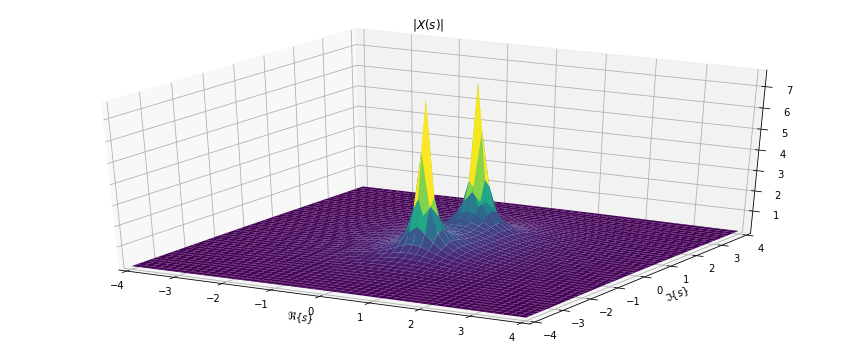

In [71]:
X1 = X.subs({s: sigma+sym.I*omega})

sym.plotting.plot3d(abs(X1),
                    (sigma, -4, 4),
                    (omega, -4, 4),
                    xlabel=r'$\Re\{s\}$', 
                    ylabel=r'$\Im\{s\}$', 
                    title=r'$|X(s)|$');

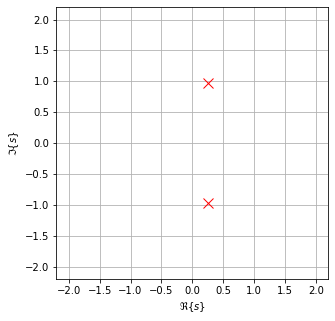

In [72]:
pole_zero_plot_(sym.roots(sym.denom(X), s), sym.roots(sym.numer(X), s))

- Analice la gráfica obtenida, escriba su análisis y determine la estabilidad del sistema y el tipo de amortiguamiento.
    - Estabilidad del sistema: Deacuerdo a la grafica el sitema inestable.
    - Tipo de amortguamiento: Es un sistema subamortiguado.
    - Ya que los polos se encuentran a la parte derecha de la grafica,hace que oscilen y su parte imaginaria es distinta a cero.

In [73]:
## Aquí va el código extra que puede requerir para responder a las preguntas.

- Defina un periodo de muestreo apropiado para el sistema.
\begin{equation}
T_\text{s} = EscribaAquíElPeriodoDeMuestreo
\end{equation}
- Encuentre el equivalente discreto del sistema (Ecuación en diferencias).
\begin{equation}
EscribaAquíLaEcuación
\end{equation}

**pista** : considere que $\frac{df}{dt} \approx \frac{f(k \cdot T_\text{s})-f((k-1)T_\text{s})}{T_\text{s}}$

- Encuentre la función de transferencia en $z$
\begin{equation}
F(z) = EscribaAquíLaFunciónDeTransferencia
\end{equation}
- Grafique el mapa de polos y ceros

In [74]:
## Aquí va el código para generar la gráfica pedida. Ejecute el código para generar la gráfica.

- Grafique y compare la respuesta frecuencial del sistema en tiempo continuo y en tiempo discreto.

In [75]:
## Aquí va el código para generar la gráfica pedida. Ejecute el código para generar la gráfica.

## Análisis comparativo

Con base en los resultados anteriores, realice un análisis comparativo y escriba sus observaciones

- Escriba aquí sus respuestas
- Puede usar viñetas

## Conclusiones

Escriba sus conclusiones

- Use viñetas